# Convolutional Neural Network

### Importing the libraries

In [3]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [6]:
tf.__version__

'2.12.0'

In [7]:
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/pokemon/pika_pika/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 50 images belonging to 2 classes.


### Preprocessing the Test set

In [10]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/pokemon/pika_pika/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 10 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [13]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [15]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [16]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [18]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [19]:
trained_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
2/2 [==============================] - 19s 7s/step - loss: 1.0039 - accuracy: 0.4400 - val_loss: 0.6403 - val_accuracy: 0.5000
Epoch 2/25
2/2 [==============================] - 1s 1s/step - loss: 0.7182 - accuracy: 0.4800 - val_loss: 0.8014 - val_accuracy: 0.5000
Epoch 3/25
2/2 [==============================] - 2s 794ms/step - loss: 0.7171 - accuracy: 0.4800 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/25
2/2 [==============================] - 1s 453ms/step - loss: 0.6393 - accuracy: 0.6600 - val_loss: 0.6612 - val_accuracy: 0.6000
Epoch 5/25
2/2 [==============================] - 1s 827ms/step - loss: 0.6082 - accuracy: 0.6200 - val_loss: 0.6651 - val_accuracy: 0.5000
Epoch 6/25
2/2 [==============================] - 1s 808ms/step - loss: 0.6118 - accuracy: 0.5200 - val_loss: 0.6533 - val_accuracy: 0.5000
Epoch 7/25
2/2 [==============================] - 1s 465ms/step - loss: 0.5669 - accuracy: 0.5800 - val_loss: 0.6075 - val_accuracy: 0.6000
Epoch 8/25
2/2 [=========

## Part 4 - Making a single prediction

In [42]:
import numpy as np
import matplotlib.image as mpimg
import keras.utils as image


img_path = '/content/drive/MyDrive/pokemon/pika_pika/single_prediction/check_1.jpg'
test_image = image.load_img(img_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Pikachu'
else:
  prediction = 'Raichu'

1/1 [==============================] - 0s 25ms/step


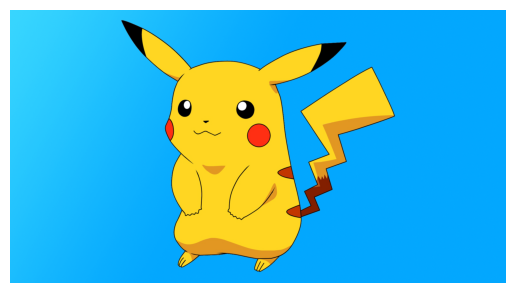

Stats of Pikachu : 
 - hp: 35
 - attack: 55
 - defense: 40
 - special-attack: 50
 - special-defense: 50
 - speed: 90

Type :
- electric

Abilities:
- static
- lightning-rod


In [43]:
import requests

# Display the input image
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()


response = requests.get(f'https://pokeapi.co/api/v2/pokemon/{prediction.lower()}')
pokemon_data = response.json()

# Display the Pokémon stats
print("Stats of {} : ".format(prediction))
for stat in pokemon_data['stats']:
    print(f" - {stat['stat']['name']}: {stat['base_stat']}")

print('\nType :')
for type in pokemon_data['types']:
    print(f"- {type['type']['name']}")

print('\nAbilities:')
for ability in pokemon_data['abilities']:
    print(f"- {ability['ability']['name']}")
